# Linear Regression Examples

This Jupyter notebook presents examples building on theory from the lectures.

In [1]:
# Boilerplate initialisation code
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 24
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### Example: Wind tunnel data

In a sequence of 8 experiments, a sensor is suspended in a wind tunnel to measure the force $F$ experienced (in Newtons) at various wind speeds $v$ (in m/s). The data is stored in the file `wind_tunnel.csv`.

In [2]:
data = pd.read_csv('wind_tunnel.csv')  # Load data as usual using Pandas
data.head()

,speed,force
0,10,25
1,20,70
2,30,380
3,40,550
4,50,610


Generate a quick plot...

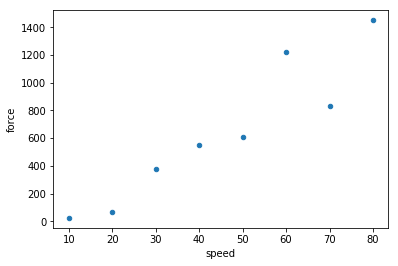

In [3]:
n = len(data) # number of samples
data.plot.scatter(x='speed', y='force', marker='o')
plt.show()

Extract Numpy arrays from DataFrame for target $y$ and matrix $\mathbf{X}$...

In [4]:
n = len(data) # number of samples
y = data.force.values.reshape((n,1))
X = np.hstack((np.ones((n,1), dtype=np.float64), data.speed.values.reshape((n,1))))
print(X) # Preview array X; padded with column of ones as required
print(y) # Preview target vector y

[[ 1. 10.]
 [ 1. 20.]
 [ 1. 30.]
 [ 1. 40.]
 [ 1. 50.]
 [ 1. 60.]
 [ 1. 70.]
 [ 1. 80.]]
[[  25]
 [  70]
 [ 380]
 [ 550]
 [ 610]
 [1220]
 [ 830]
 [1450]]


With $\mathbf{X}$ and $y$ as matrices, can solve linear system several ways:

In [5]:
np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y)) # one method

array([[-234.28571429],
       [  19.4702381 ]])

In [6]:
# alternative way to compute same thing
w_LS = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
print(w_LS)

[[-234.28571429]
 [  19.4702381 ]]


Produce a 2D plot showing original data and the least-squares line of best fit

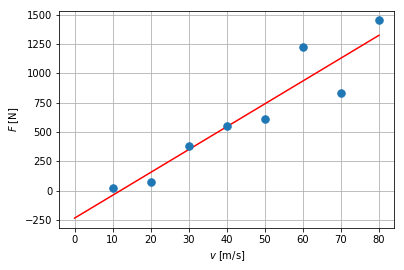

In [7]:
vv = np.linspace(0,80)        # Generate a grid of speed values
FF = w_LS[0,0] + w_LS[1,0]*vv # Generate the corresponding force values 
plt.plot(vv, FF, 'r', X[:,1], y, 'o', markersize=7.5)
plt.xlabel('$v$ [m/s]')
plt.ylabel('$F$ [N]')
plt.grid(True)
plt.show()

To get a sense of how well the line fits the data, compute the *RMSE* (*Root Mean Square Error*) and the *$R^2$ statistic*.

* The RMSE is square root of the average residual squared error (i.e., find the total residual squared error divided by the number of samples and then compute the square root). In terms of the notation used so far, this is $$\displaystyle{\sqrt{\frac{1}{n}\left\|y -\mathbf{X}w_{LS}\right\|^2} = \sqrt{\frac{1}{n}\sum_{k=1}^{n}\left(y_{k} - x_{k}^{T}w_{LS}\right)^{2}}}.$$
* The [$R^2$ statistic (or coefficient of determination)](https://en.wikipedia.org/wiki/Coefficient_of_determination) is the fraction remaining when the ratio of the sum of the squared residuals to the total sum of squares is subtracted from one. The result is a number between 0 and 1 that quantifies how well the regression line explains the data. In effect, this is $$\displaystyle{1 - \left[\sum_{k=1}^{n}\left(y_{k}-\overline{y}\right)^{2}\right]^{-1}} \sum_{\ell=1}^{n}\left(y_{\ell} - x_{\ell}^{T}w_{LS}\right)^{2}.$$

Here, accumulate the sum of squared residuals in `ss_r` and the sum of total squares (differences from mean of $y$) in `ss_t`. These can be used to compute the RMSE and $R^2$.

In [8]:
ss_t = 0.0 # for accumulating the total sum of squares (i.e., differences of y[k] from y.mean() squared)
ss_r = 0.0 # for accumulating the sum of squared residuals
mean_y = y.mean() # compute once

b0 = w_LS[0,0]
b1 = w_LS[1,0]
for k in range(n):
    y_pred = b0 + b1*X[k,1]
    ss_r += (y_pred - y[k,0]) ** 2
    ss_t += (y[k,0] - mean_y) ** 2

rmse = np.sqrt(ss_r/n)
r2 = 1 - (ss_r/ss_t)
print('RMSE = {}'.format(rmse))
print('R-squared: {}'.format(r2))

RMSE = 164.36170279368028
R-squared: 0.8804852467812263


### Example: Pearson's height data

These are the heights of 1,078 fathers and their sons (in inches) based on a [famous experiment by Karl Pearson](http://www.randomservices.org/random/data/Pearson.html) around 1903. Random noise was added to the original data, to produce heights to the nearest 0.1 inch. The data is stored in the file `Pearson.csv`.

| Father  |  Son |
| ---  | --- |
| 65.0 | 59.8 |
| 63.3 | 63.2 |
| 65.0 | 63.3 |
| 65.8 | 62.8 |
| 61.1 | 64.3 |
| 63.0 | 64.2 |
| 65.4 | 64.1 |
| $\vdots$ | $\vdots$ |

In [9]:
# First, read the data into a Pandas DataFrame
data = pd.read_csv('Pearson.csv')
data.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


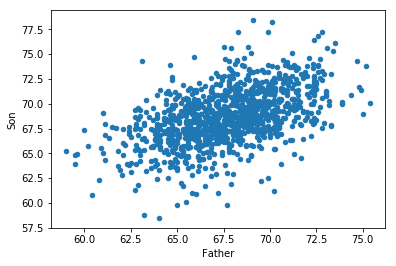

In [10]:
# In this instance, a scatter plot shows the spread of the data
data.plot.scatter(x='Father', y='Son')
plt.show()

Again, set up the vector $y$ and matrix $\mathbf{X}$ as required to compute the weights $w_{LS}$:

In [11]:
n = len(data)
y = data.Son.values.reshape((n,1)) # Extract as a numpy array
X = np.hstack( (np.ones((n, 1), dtype=np.float64), data.Father.values.reshape((n,1))))

In [12]:
# Finally, "solve" the required overdetermined system of linear equations X w = y.
w_LS = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
print(w_LS)

[[33.89280054]
 [ 0.51400591]]


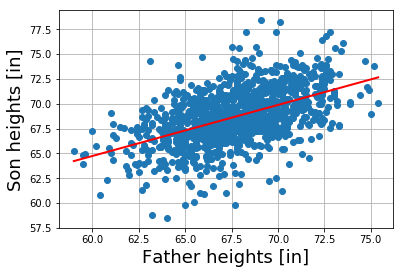

In [13]:
# Produce a 2D plot showing the data and the least-squares line of best fit
FF = np.linspace(data.Father.min(), data.Father.max())
SS = w_LS[0,0] + w_LS[1,0]*FF # Generate 
plt.plot(X[:,1], y, 'o', FF, SS, 'r', linewidth=2)
plt.xlabel('Father heights [in]', fontsize=18)
plt.ylabel('Son heights [in]', fontsize=18)
plt.grid(True)
plt.show()

As before, compute RMSE & $R^2$

In [14]:
ss_t = 0.0 # for accumulating the total sum of squares (i.e., differences of y[k] from y.mean() squared)
ss_r = 0.0 # for accumulating the sum of squared residuals
mean_y = y.mean() # compute once

b0 = w_LS[0,0]
b1 = w_LS[1,0]
for k in range(n):
    y_pred = b0 + b1*X[k,1]
    ss_r += (y_pred - y[k,0]) ** 2
    ss_t += (y[k,0] - mean_y) ** 2

rmse = np.sqrt(ss_r/n)
r2 = 1 - (ss_r/ss_t)
print('RMSE = {}'.format(rmse))
print('R-squared: {}'.format(r2))

RMSE = 2.4358716091393404
R-squared: 0.2511640326342508


Using Numpy's linear algebra utilities, above loops can be eliminated:

In [15]:
y_pred = np.dot(X, w_LS)
ss_r = np.linalg.norm(y_pred - y) ** 2
rmse = np.sqrt(ss_r/n)
print('RMSE_linalg = {}'.format(rmse)) # Same as above

RMSE_linalg = 2.43587160913934


In [16]:
ss_t = np.linalg.norm(y - y.mean()) ** 2
r2 = 1-(ss_r/ss_t)
print('R-squared_linalg = {}'.format(r2)) # Same as above (mostly)

R-squared_linalg = 0.25116403263425147


Notice that the $R^2$ statistic is dimensionless while the RMSE is not. The former quantifies the appropriateness of the line fit in a relative sense, whereas the RMSE gives an absolute measure of misfit (which, depending on the scaling of the problem, can be deceptive).

### Example: NHANES data

The table below give the results of a random sample of size 100 from the [2005–2006 National Health and Nutrition Examination Survey (NHANES)](http://www.randomservices.org/random/data/NHANES.html). The variables are Gender (male or female), Age (in years), Weight (in lbs), Height, Leg length, Waist circumference, & Thigh circumference (all in inches). The data is stored in the file `NHANES.csv`.

With this data, we can apply linear regression with multiple independent (or exogenous) variables; this is sometimes called *multiple linear regression*.



In [17]:
data = pd.read_csv('NHANES.csv')
data.head()

,Gender,Age,Weight,Height,Leg,Waist,Thigh
0,F,52,231.0,63.3,14.2,43.6,25.8
1,M,75,198.0,67.0,15.6,41.8,20.1
2,F,29,155.9,63.9,15.7,36.0,19.2
3,M,18,177.7,71.2,18.1,33.3,22.4
4,M,51,225.3,69.3,15.6,40.0,23.0


Use Pandas/Numpy techniques for filtering to separate genders:

In [18]:
women = (data.Gender=='F') # Define boolean series to select each gender from data
men = ~women
women = data.loc[women]
men = data.loc[men]
women.head()

,Gender,Age,Weight,Height,Leg,Waist,Thigh
0,F,52,231.0,63.3,14.2,43.6,25.8
2,F,29,155.9,63.9,15.7,36.0,19.2
5,F,21,173.1,59.1,13.7,38.2,23.5
6,F,45,149.0,65.2,15.4,34.8,18.3
7,F,72,189.4,62.6,11.8,44.3,20.7


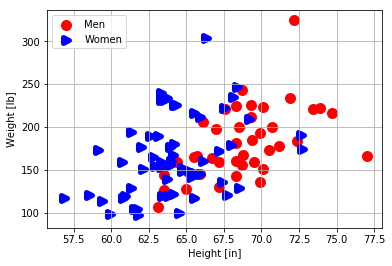

In [19]:
# Examine a 2D cross-section of the data stratified by gender
plt.scatter(men.Height, men.Weight, color='r', marker='o', linewidth=5, label='Men')
plt.scatter(women.Height, women.Weight, color='b', marker='>', linewidth=5, label='Women')
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel('Height [in]')
plt.ylabel('Weight [lb]')
plt.show()

Let's think of Weight as a dependent variable and construct a linear regression model using the other variables (except for gender; we've separated out the two categories of subjects) as independent variables. To do this, we'll subselect a sequence of columns from the DataFrame and use those to construct a regression.

In [20]:
n_men = len(men)
cols = men.columns.symmetric_difference(['Gender', 'Weight'])
men.loc[:,cols].head()

,Age,Height,Leg,Thigh,Waist
1,75,67.0,15.6,20.1,41.8
3,18,71.2,18.1,22.4,33.3
4,51,69.3,15.6,23.0,40.0
11,35,69.3,18.1,24.2,41.6
13,71,70.5,15.7,17.8,36.7


In [21]:
# Extract target y and matrix X
y_men = men['Weight'].values.reshape((n_men,1))
X_men = np.concatenate((np.ones((n_men,1),dtype=np.float64), men.loc[:, cols].values), axis=1)

Ready to solve $w_{LS} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}y$ as usual...

In [22]:
# Determine the regression weights
w_men_LS = np.linalg.solve(np.matmul(X_men.T, X_men), np.dot(X_men.T, y_men))
print(w_men_LS)

[[-3.00986178e+02]
 [ 1.45697554e-01]
 [ 3.74458616e+00]
 [-4.03269304e+00]
 [ 7.39818255e+00]
 [ 3.52308659e+00]]


In [23]:
y_pred = X_men.dot(w_men_LS)
ss_r = np.linalg.norm(y_pred - y_men) ** 2
ss_t = np.linalg.norm(y - y.mean()) ** 2
rmse = np.sqrt(ss_r/n_men)
print('RMSE_linalg = {}'.format(rmse))
r2 = 1-(ss_r/ss_t)
print('R-squared_linalg = {}'.format(r2))

RMSE_linalg = 5.685706002979626
R-squared_linalg = 0.8486132247825345


### Example: Polynomial regression

As discussed in the lectures, linear regression is *linear* due to the linear dependence on the coefficients. It is possible to have determine coefficients of linear combinations of arbitrary nonlinear functions to fit data. This is appropriate to describe trends (e.g., periodicity) that cannot be described well by degree one polynomials.

As an example, let's try to fit the following points on a rectangular pulse using polynomial functions.

First, generate the data points for the rectangular pulse...

In [24]:
x = np.linspace(-5, 5, 11).reshape((11,1))
y = np.zeros((11,1))
y[3:6] = 1

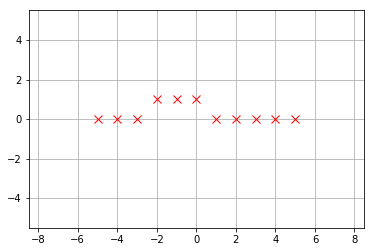

In [25]:
plt.plot(x, y, 'rx', markersize=7.5)
plt.axis('equal')
plt.ylim([-5.5, 5.5])
plt.xlim([-2, 2])
plt.grid(True)
plt.show()

[[ 0.56410256]
 [-0.02727273]
 [-0.02913753]]


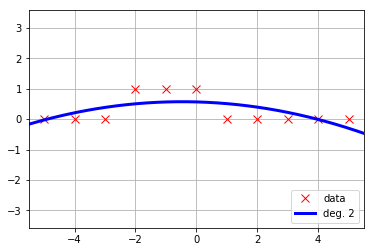

In [26]:
n = len(x)
X = np.hstack([x**k for k in range(3)])

w2 = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
print(w2)
xx = np.linspace(-5.5, 5.5, 200).reshape((200,1))
y2 = np.hstack((np.ones((200,1)), xx, xx**2)).dot(w2) # Evaluate on grid

plt.plot(x, y, 'rx', markersize=7.5, label='data')
plt.plot(xx, y2, 'b-', linewidth=3, label='deg. 2')
plt.axis('equal')
plt.legend(loc='lower right')
plt.xlim([-5.5, 5.5])
plt.ylim([-2, 2])
plt.grid(True)
plt.show()

[[ 0.75291375]
 [-0.39965035]
 [-0.09469697]
 [ 0.04778555]
 [ 0.00262238]
 [-0.00128205]]


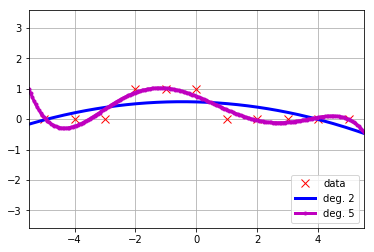

In [27]:
X = np.hstack([x**k for k in range(6)])
w5 = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
print(w5)
y5 = np.hstack((np.ones((200,1)), xx, xx**2, xx**3, xx**4, xx**5)).dot(w5) # Evaluate on grid

plt.plot(x, y, 'rx', markersize=7.5, label='data')
plt.plot(xx, y2, 'b-', linewidth=3, label='deg. 2')
plt.plot(xx, y5, 'm.-', linewidth=3, label='deg. 5')
plt.axis('equal')
plt.legend(loc='lower right')
plt.xlim([-5.5, 5.5])
plt.ylim([-2, 2])
plt.grid(True)
plt.show()

[[ 7.79038299e-01]
 [-5.95238095e-01]
 [-9.23702544e-02]
 [ 9.73875661e-02]
 [-3.13252494e-03]
 [-1.90972222e-03]
 [ 6.14895081e-04]
 [-2.48015873e-04]
 [-1.56641604e-05]
 [ 8.26719577e-06]]


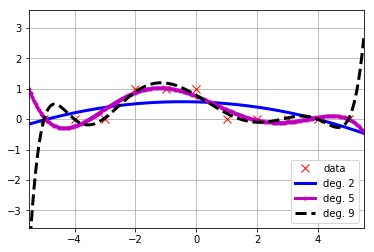

In [28]:
X = np.hstack([x**k for k in range(10)])
w9 = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
print(w9)
y9 = np.hstack((np.ones((200,1)), xx, xx**2, xx**3, xx**4, 
                xx**5, xx**6, xx**7, xx**8, xx**9)).dot(w9) # Evaluate on grid

plt.plot(x, y, 'rx', markersize=7.5, label='data')
plt.plot(xx, y2, 'b-', linewidth=3, label='deg. 2')
plt.plot(xx, y5, 'm.-', linewidth=3, label='deg. 5')
plt.plot(xx, y9, 'k--', linewidth=3, label='deg. 9')
plt.axis('equal')
plt.legend(loc='lower right')
plt.xlim([-5.5, 5.5])
plt.ylim([-2, 2])
plt.grid(True)
plt.show()

In [29]:
w2_polyfit = np.polyfit(x.squeeze(), y.squeeze(), 2) # Find coefficients of degree 2 polynomial regression
print(w2.squeeze(), w2_polyfit) # same coefficients, reverse order
y2 = np.polyval(w2_polyfit,xx)

[ 0.56410256 -0.02727273 -0.02913753] [-0.02913753 -0.02727273  0.56410256]
